# SARIMA forecast

## 01 - Background

Our goal in this challenge is to apply the basic concepts of time series analysis on one-dimension data (sales depending on the date).

In this challenge, we'll go through the following steps : 
1. load and visualize the data;
2. train our models and make predictions;
3. use an econometric approach to model the serie and be able to forecast it;
4. use machine learning to hack this modelization.

The dataset is the csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## 02 - Load Data and Plot Time Series
Let's start by loading the time series of the challenge and plot the time series

In [2]:
df=pd.read_csv('data/monthly_champagne_sales.csv', sep=',')

In [3]:
df = df.reset_index()
df = df.rename(columns={'index': 'Month','Month,"Sales"':'Sales'})

In [4]:
df.index = df['Month'].apply(lambda x: x + "-01")
df=df.drop('Month', axis=1)

👉 Convert dataframe with datetime objects as index to make it look like this
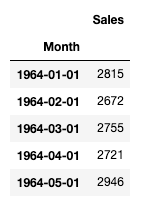

In [5]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


## 04 - Visualize and interpet the data

Well done, thanks to this "reindexing", you should now be able to plot the "Sales" (y-axis) as a function of the time (x-axis) easily

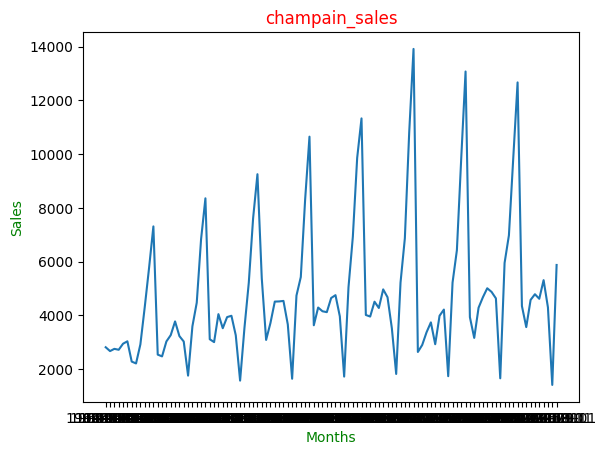

In [6]:
plt.subplot()
plt.plot(df)
plt.title("champain_sales", c="r")
plt.ylabel("Sales", c="g")
plt.xlabel("Months", c="g")
plt.show()

If your code is correct, you should be able to see that this Time Serie (TS) is:
- Not stationary (mean and variance are not constant).
- Exhibits strong seasonality.
- Seems to have a trend.

Let's see a decomposition of the data between **trend**, **saisonality** and **noise**. In order to do that, you have to make use of statsmodels [`seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). Read the docs and make sure you understand what this function is doing and how to use it. Then:
1. plot the "Sales" with an "additive" model
2. plot the "Sales" with a "multiplicative" model

Pro tips: end your statsmodels plot method calls with a `;` to avoid double-plotting issues

In [7]:
# df = pd.DataFrame(parse_dates=['Month'])
df.index= pd.to_datetime(df.index)

In [8]:
df.index.freq = 'MS' # set the frequency of the time series to 'month start'

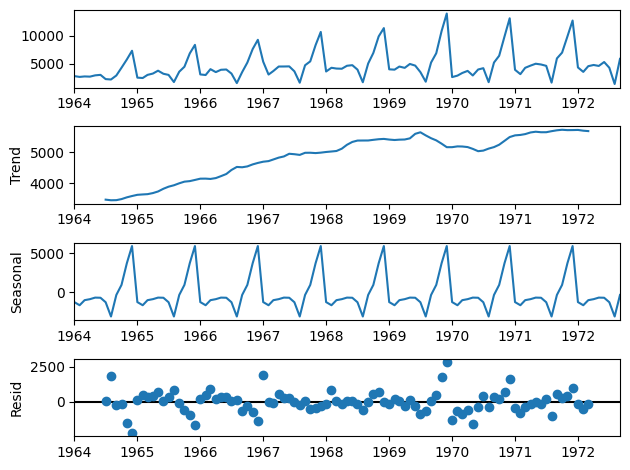

In [9]:
test= seasonal_decompose(df, model='additive')
test.plot();

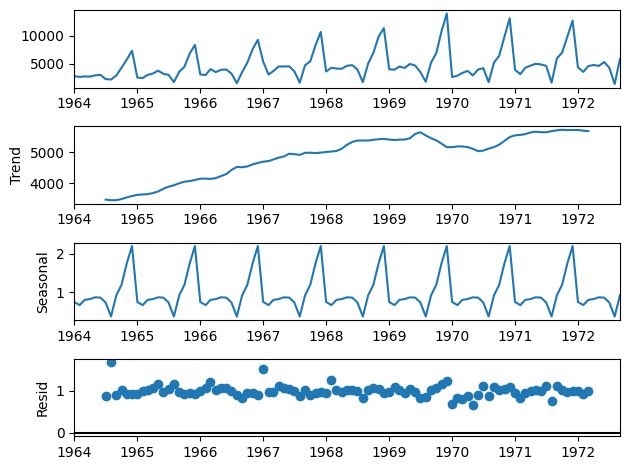

In [10]:
diff_mul= seasonal_decompose(df, model='multiplicative')
diff_mul.plot();

👉 De-seasonalize this time serie using the decomposition of your choice

In [16]:
de_sea = df / diff_mul.seasonal
de_sea.head()

,1964-01-01 00:00:00,1964-02-01 00:00:00,1964-03-01 00:00:00,1964-04-01 00:00:00,1964-05-01 00:00:00,1964-06-01 00:00:00,1964-07-01 00:00:00,1964-08-01 00:00:00,1964-09-01 00:00:00,1964-10-01 00:00:00,...,1972-01-01 00:00:00,1972-02-01 00:00:00,1972-03-01 00:00:00,1972-04-01 00:00:00,1972-05-01 00:00:00,1972-06-01 00:00:00,1972-07-01 00:00:00,1972-08-01 00:00:00,1972-09-01 00:00:00,Sales
Month,,,,,,,,,,,,,,,,,,,,,
1964-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


☝️ We could fit an ARIMA model on a "de-seasonalized" version of this time serie, and then re-compose it back after our forecast. But in this challenge, we will use SARIMA models to _directly_ fit the original time serie!

## 05 - Split the data (train/test)


For time series, we cannot randomly sample points to be in the test set. The test set needs to be "out-of-time", that is, strictly in the future of the test set. For the purpose of this exercise, we will use data up to 1970 for training and after for the test.

👉 create `df_train` and `df_test`, splitting the DataFrame before 1970 for the training and after (or equal to) for the testing

In [19]:
df_train=df[:'1969-12-01']
df_test=df['1970-01-01':]
df_test.head()

,Sales
Month,
1970-01-01,2639
1970-02-01,2899
1970-03-01,3370
1970-04-01,3740
1970-05-01,2927


## 06 - SARIMA
We will analyse the data using a SARIMA model (Seasonal Auto Regressive Integrated Moving Average).


We need to :
- find how to stationarize the time serie (I in SARIMA)
- find the auto-regressive (AR) part
- find the Moving-Average (MA) part
- find the seasonality (S)

### Step 1: Check stationarity

If a time series has a trend or seasonality component, it must be made stationary before we can use ARIMA to forecast.

A quick glance at the plot above should be sufficient to convince you that the time serie is not stationary.

Double check the stationarity of `df["Sales"]` using the [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) and especially its p-value

In [22]:
from statsmodels.tsa.stattools import adfuller
saes=adfuller(df["Sales"], maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
saes

(-1.8335930563276184,
 0.36391577166024713,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

The p-value should be less than 0.05 to have a 95% confidence in the stationarity.  

If the p-value is larger than 0.05, we cannot reject the null hypothesis (null hypothesis = "the process is not stationary").

Ideally, p is *much* smaller than 0.05.

Another way to look for stationarity, is to look at the autocorrelation function (ACF).

Plot the ACF of the time series. You should see a large peak at lag 12, indicating strong yearly seasonality.

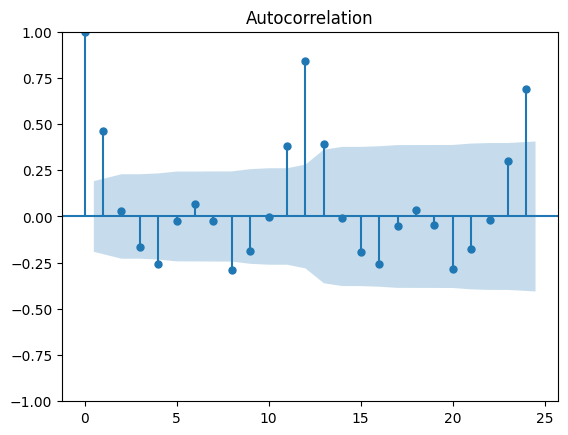

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Sales'], lags=24)
plt.show()

### Step 2 - Seasonal differencing (D)

We have a strong seasonality with a period of 12 months.

Do a **seasonal differencing of lag 12** on the time series, and plot the differenced data and check the ACF plot (+ADF test) again.

Don't forget to drop NaN's.

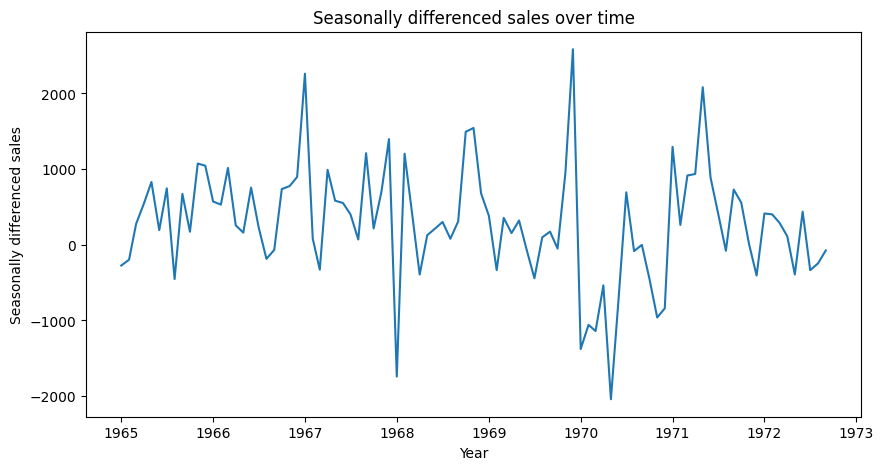

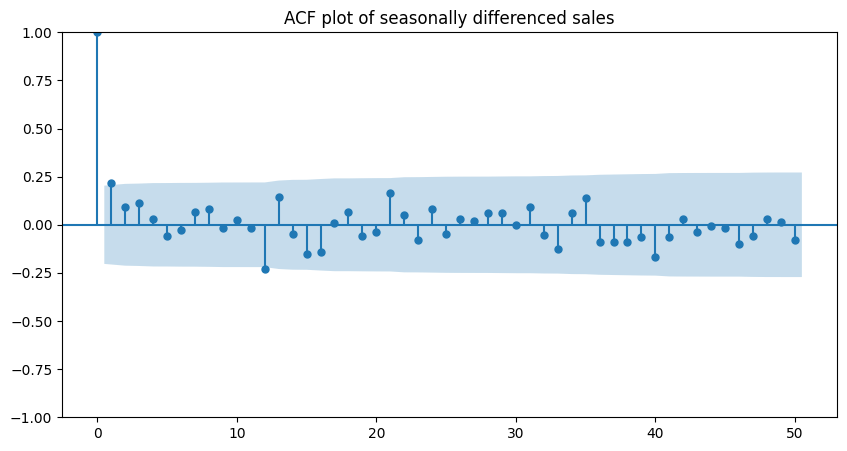

ADF Statistic: -7.627
p-value: 0.000


In [25]:
# Seasonal differencing with lag 12
df_diff = df.diff(periods=12).dropna()

# Plot the differenced data
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_diff)
ax.set_xlabel('Year')
ax.set_ylabel('Seasonally differenced sales')
ax.set_title('Seasonally differenced sales over time')

# Check the ACF plot
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(df_diff, ax=ax, lags=50)
ax.set_title('ACF plot of seasonally differenced sales')
plt.show()

# Augmented Dickey-Fuller test
adf_result = adfuller(df_diff['Sales'])
print(f'ADF Statistic: {adf_result[0]:.3f}')
print(f'p-value: {adf_result[1]:.3f}')


☝️ One single seasonal differencing seems enough to stationarize the TS.  
D=1 (1 seasonal diff) and m=12 (seasonality = 12) for SARIMA(p,d,q, P,D,Q,m)

### Step 3 - Differencing (d)

If the time series is still not stationary, it needs to be stationarized through *differencing*. It means that we take the difference between each value and the preceding one (*first difference*).

Do we need further differencing after removing the seasonality?

Check the ACF and ADF after running an additional first order diff(1) on your diff(12) series.

👉 Additional differencing actually made both the p-value and the ACF look worse! 
We can select (d=0) and (D=1)

### Step 4 - Select AR(p,P) and MA(q,Q) terms

You will now use the ACF and PACF plots to decide whether to include an AR term(s), MA term(s), or both.





- The autocorrelation plot ([`plot_acf`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)) applied to your **fully differentiated** series allows you to select MA number (`q`)
- MA($\color{blue}{q}$) = number of lag beyond which the $\color{blue}{ACF}$ of  $Y^{\color{green}{(d+D)}}$ cuts off


- The partial autocorrelation plot [`plot_pacf`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html) applied to your **fully differentiated** series allows you to select AR (`p`)
- AR($\color{red}{p}$) = number of lags beyond which the $\color{red}{PACF}$ of $Y^{\color{green}{(d+D)}}$  cuts off

C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


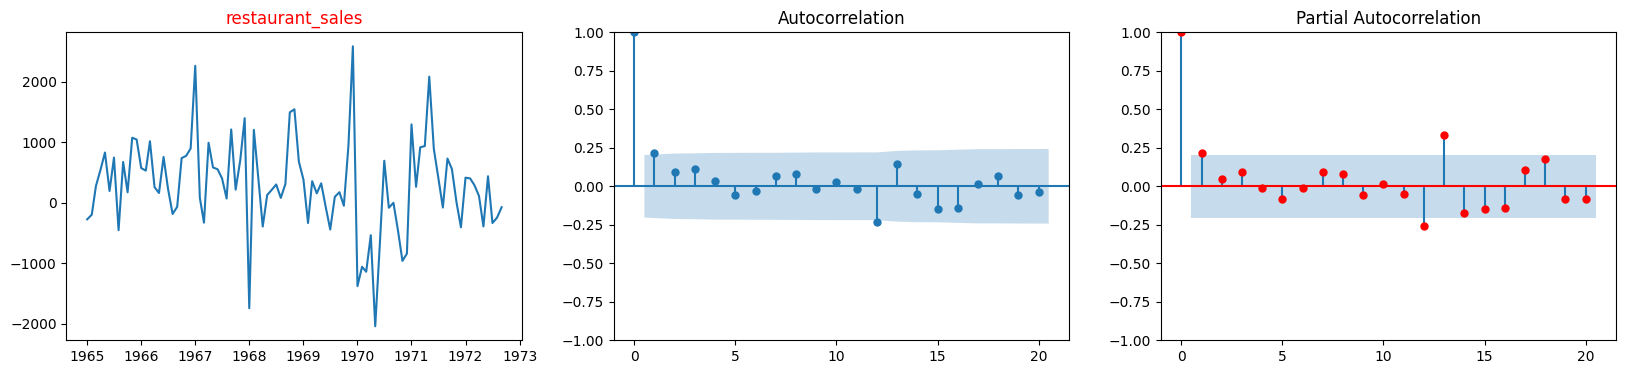

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
axes[0].plot(df_diff), axes[0].set_title("restaurant_sales", c="r")
plot_acf(df_diff, ax=axes[1]);
plot_pacf(df_diff, ax=axes[2], c='r');
plt.show()

☝️ It seems like there are no significant peaks in either ACF or PACF, so most likely p=q=0.  
Our first guess for SARIMA is therefore d=0, p=q=0, D=1 and m=12.  

How to find values for P and Q? Here, we will let pdarima try values 1 and 0 for P and Q with a grid_search for us.
If you really want to find these coefficient by yourself, [Read here 🤯 ](https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima) for some rules of thumb

👉 Run [auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) for the training set. set seasonal=True, m=12 and D=1. Search for p and q, P and Q from 0 to 2. Then, print the summary of the model with model.summary().
Use `njobs=-1, trace=True, error_action='ignore', suppress_warnings=True`

In [28]:
from pmdarima.arima import auto_arima
model =auto_arima(df_train, seasonal=True, m=12, D=1, 
                  start_q=0, max_q=2, start_Q=0, max_Q=2, start_p=0, max_p=2, start_P=0, max_P=2,
                  njobs=-1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=954.252, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=957.794, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=957.973, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=974.624, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=956.000, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=955.904, Time=0.14 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=957.929, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=956.182, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=956.250, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=958.187, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 0.786 seconds


The best model found is `ARIMA(0,0,0)(0,1,0)[12]` ! 
This means that the Time Serie condidered does not justify adding any "autoregressive" nor "moving average" modelling beyond simple "seasonal differencing".

Such "poor" model is only likely to predict a repetition of the last seasonal pattern detected, alongwith the prolongation of the mean increasing trend. Let's check it out

👉 Use `model.predict` with `n_periods` = length of the test set, in order to save the following three predictions
- `central`
- `upper`
- `lower`

Save them as Pandas Series, and index them by the same index than your `y_test`

In [29]:
# Predict the future values
n_periods = len(df_diff)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Save the forecasts and confidence intervals as pandas series
central = pd.Series(forecast, index=df_diff.index)
upper = pd.Series(conf_int[:, 1], index=df_diff.index)
lower = pd.Series(conf_int[:, 0], index=df_diff.index)

👇 Run the cell below to plot your predictions against reality

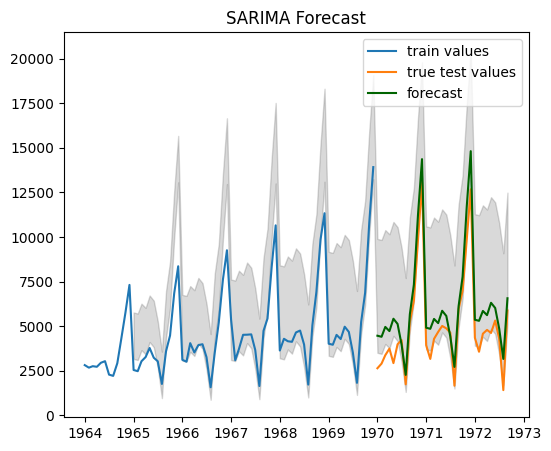

In [31]:
# Plot
plt.figure(figsize=(6,5), dpi=100)
plt.plot(df_train, label = "train values")
plt.plot(df_test, label = "true test values")
plt.plot(central, color='darkgreen',label = "forecast")
plt.fill_between(lower.index, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

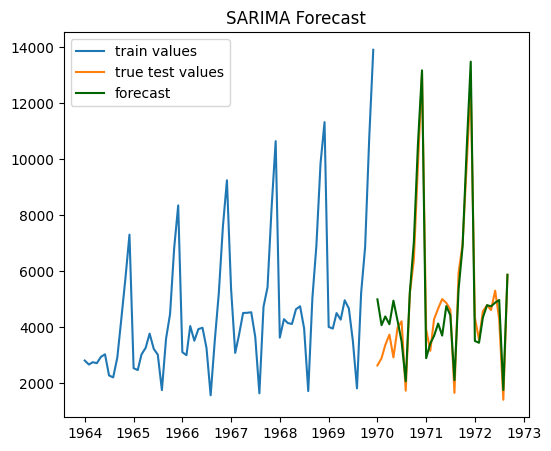

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# create SARIMA model with p,d,q,P,D,Q,s parameters
model = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# fit the model
model= model.fit()

# make predictions for the test set
# forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast = model.predict(n_periods=n_periods, return_conf_int=False)

# Save the forecasts as a pandas series
central = pd.Series(forecast, index=df_test.index)

# Plot
plt.figure(figsize=(6,5), dpi=100)
plt.plot(df_train, label="train values")
plt.plot(df_test, label="true test values")
plt.plot(central, color='darkgreen', label="forecast")
plt.title("SARIMA Forecast")
plt.legend()
plt.show()

👉 Try to assign non-null values to  `p`,`d`,`P`,`D` on your SARIMA and re-plot this chart to compare effects!

# Machine Learning Approach

### Model with forecast horizon = 1 month only

We will now fit a non linear model such as a random forest. The idea is to predict a value from the last ones. 

👉 Create new columns in `df` that are shifted version of `df['Sales']`. Do it with a shift from 1 to 12.

In [66]:
df_1= df.copy()

In [70]:
# Add lagged values
for month in range(1, 13):
    column_name = f"yt-{month}"
    df[column_name] = df_1["Sales"].shift(month)
# Drop nan
df_1.dropna(inplace=True)

# create df_train and df_test 
df1_train = df_1[:'1969-12-01']
df1_test = df_1['1970-01-01':]
df1_test.head()

,Sales,yt-1,yt-2,yt-3,yt-4,yt-5,yt-6,yt-7,yt-8,yt-9,yt-10,yt-11,yt-12
Month,,,,,,,,,,,,,
1970-01-01,2639,13916.0,10803.0,6872.0,5222.0,1821.0,3523.0,4677.0,4968.0,4276.0,4510.0,3957.0,4016.0
1970-02-01,2899,2639.0,13916.0,10803.0,6872.0,5222.0,1821.0,3523.0,4677.0,4968.0,4276.0,4510.0,3957.0
1970-03-01,3370,2899.0,2639.0,13916.0,10803.0,6872.0,5222.0,1821.0,3523.0,4677.0,4968.0,4276.0,4510.0
1970-04-01,3740,3370.0,2899.0,2639.0,13916.0,10803.0,6872.0,5222.0,1821.0,3523.0,4677.0,4968.0,4276.0
1970-05-01,2927,3740.0,3370.0,2899.0,2639.0,13916.0,10803.0,6872.0,5222.0,1821.0,3523.0,4677.0,4968.0


In [76]:
# Keep track of test_indexes
test_indexes = df_1.loc['1970':].reset_index().index +1
test_indexes 

RangeIndex(start=1, stop=34, step=1)

In [77]:
# Create X, y
X = df_1.drop(columns=["Sales"])
y = df_1["Sales"]
y.head()

Month
1965-01-01    2541
1965-02-01    2475
1965-03-01    3031
1965-04-01    3266
1965-05-01    3776
Freq: MS, Name: Sales, dtype: int64

👉 Instanciate (don't train) a `random forest` algorithm to predict Sales based in your shifted features

In [81]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=123)

👉 You can use the following function to test it. It takes the true y values (`data` which should be a Numpy array), the indexes of the test samples (`test_indexes`), the predictor (`predictor`: your random forest algorithm) and the shifted columns (`full_X` which should be a Numpy array).

In [84]:
# For each predictor, design a method to evaluate its performance on the test set:
from sklearn.metrics import r2_score
import numpy as np
def evaluate_performance_month_prediction(y_true, test_indexes, predictor, full_X):
    predictions = []
    ground_truth = []
    i = 0
    for _indx in test_indexes:
        train_data = y_true[:_indx]
        current_ground_truth = y_true[_indx]
        current_ground_truth_features = full_X[_indx,:]
        train_features = full_X[:_indx]
        # train the model on all datapoint until (t-1) in order to predict (t)
        predictor.fit(train_features, train_data)
        prediction = predictor.predict(current_ground_truth_features.reshape(1,-1))[0]
        predictions.append(prediction)
        ground_truth.append(current_ground_truth)
        i += 1
    mape = np.mean(np.abs(np.array(predictions) - np.array(ground_truth))/np.abs(np.array(ground_truth)))
    return ground_truth, predictions, mape

In [85]:
results = evaluate_performance_month_prediction(y.values, test_indexes=test_indexes,
                                                         predictor=random_forest, full_X = X.values)

In [86]:
print('Mean Absolute Prediction Error MAPE')
results[2]

Mean Absolute Prediction Error MAPE


0.21013484124852286

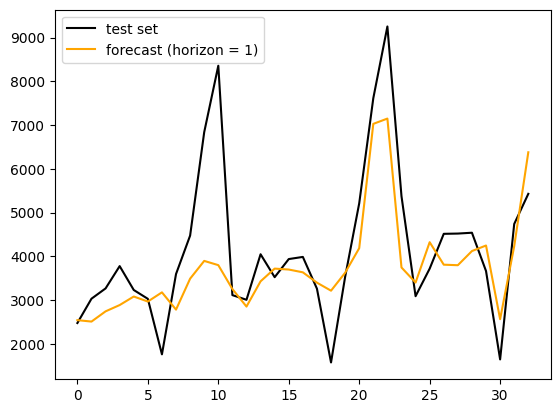

In [87]:
plt.plot(results[0], c='black', label='test set')
plt.plot(results[1], c='orange', label='forecast (horizon = 1)')
plt.legend()

To improve our model, we can do some feature engineering. You will add moving averages to the data used to train the random forest.

Try to create 3 new columnns in `df`: one which is the rolling average of `df[Sales]` with a window of 12, one with a window of 3, and one with a window of 2. This will have the effect to isolate the trend and allow the algorithm to learn it. Also, plot these data.


In [ ]:
# Extract the trend using a well chosen moving average

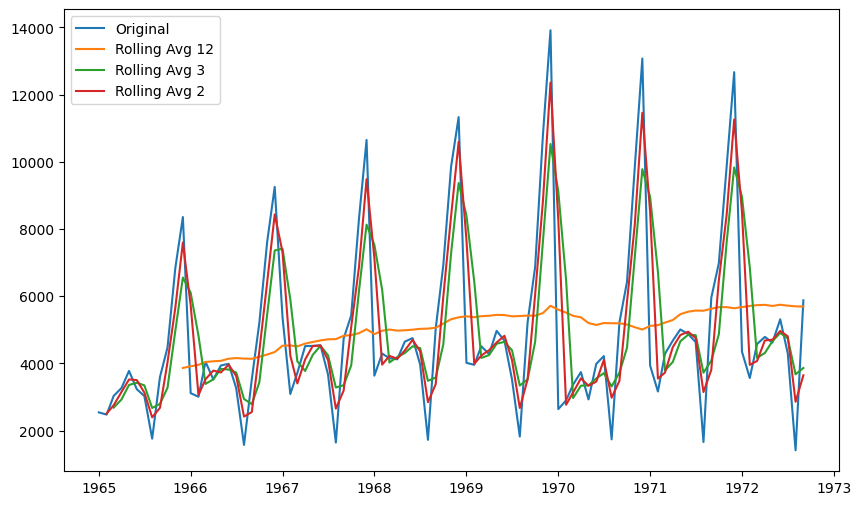

In [89]:
# create rolling average columns
df_1['Rolling_Avg_12'] = df_1['Sales'].rolling(window=12).mean()
df_1['Rolling_Avg_3'] = df_1['Sales'].rolling(window=3).mean()
df_1['Rolling_Avg_2'] = df_1['Sales'].rolling(window=2).mean()

# plot the data
plt.figure(figsize=(10,6))
plt.plot(df_1['Sales'], label='Original')
plt.plot(df_1['Rolling_Avg_12'], label='Rolling Avg 12')
plt.plot(df_1['Rolling_Avg_3'], label='Rolling Avg 3')
plt.plot(df_1['Rolling_Avg_2'], label='Rolling Avg 2')
plt.legend()
plt.show()

You can also add a more smoothing predictor using the exponential moving average (hint: method `.ewm` with `halflife` of 2, 3 and 12), that statistically optimizes an AR process. Plot also the data.

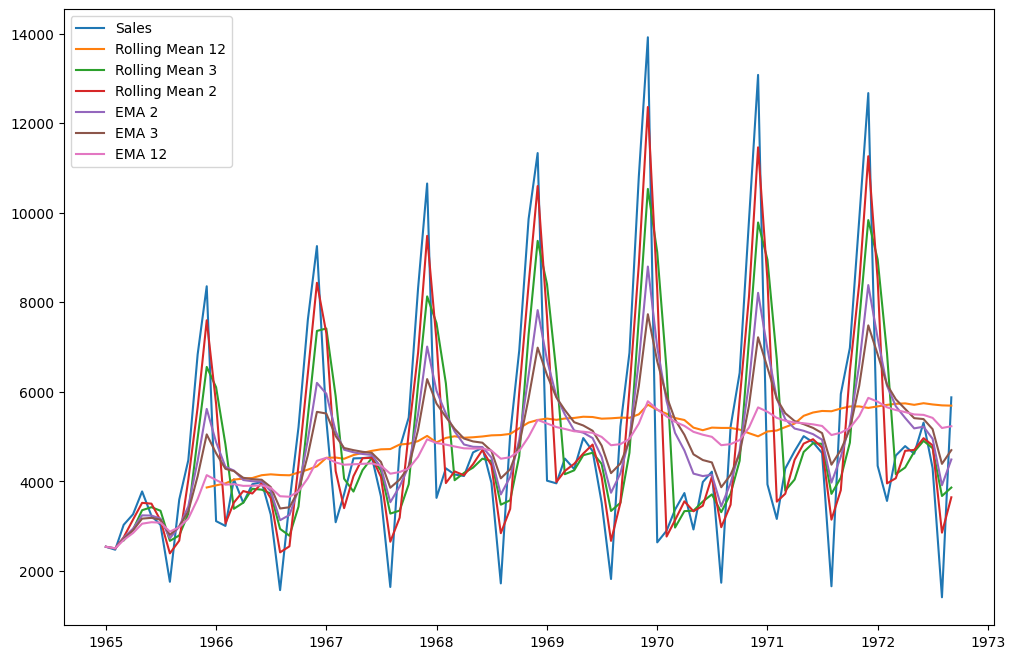

In [92]:
# add exponential moving averages to df
df_1['ema_2'] = df_1['Sales'].ewm(halflife=2).mean()
df_1['ema_3'] = df_1['Sales'].ewm(halflife=3).mean()
df_1['ema_12'] = df_1['Sales'].ewm(halflife=12).mean()

# plot the data
plt.figure(figsize=(12,8))
plt.plot(df_1['Sales'], label='Sales')
plt.plot(df_1['Rolling_Avg_12'], label='Rolling Mean 12')
plt.plot(df_1['Rolling_Avg_3'], label='Rolling Mean 3')
plt.plot(df_1['Rolling_Avg_2'], label='Rolling Mean 2')
plt.plot(df_1['ema_2'], label='EMA 2')
plt.plot(df_1['ema_3'], label='EMA 3')
plt.plot(df_1['ema_12'], label='EMA 12')
plt.legend()
plt.show()


You should see a better MAPE!

In [94]:
# calculate the absolute error between actual and predicted values
abs_error = abs(df_1['Sales'] - central)

# calculate the absolute percentage error (MAPE)
mape = (abs_error / df_1['Sales']) * 100

# calculate the mean of the MAPE
mape_mean = mape.mean()

print("MAPE:", mape_mean)
# old one:
# Mean Absolute Prediction Error MAPE :0.21013484124852286

MAPE: 15.853060783617762


Try to look at the importance of each feature. What do you find?


Feature: yt-1, Score: 0.30808354493419676 %
Feature: yt-2, Score: 0.2839623821037877 %
Feature: yt-3, Score: 0.40974595833688077 %
Feature: yt-4, Score: 5.038368578081793 %
Feature: yt-5, Score: 0.41558150821691764 %
Feature: yt-6, Score: 9.583726924629508 %
Feature: yt-7, Score: 0.6689029275385519 %
Feature: yt-8, Score: 1.168035019337726 %
Feature: yt-9, Score: 1.3552968809902333 %
Feature: yt-10, Score: 1.9196367116389101 %
Feature: yt-11, Score: 1.505271912917389 %
Feature: yt-12, Score: 77.34338765127411 %


[Text(0.5, 1.0, 'Importance de chaque feature')]

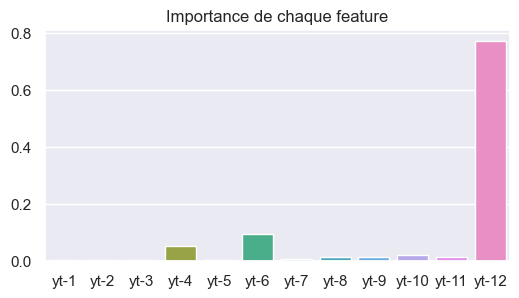

In [103]:
import seaborn as sns
# Get feature importances from the trained model
importances = random_forest.feature_importances_
features = X.columns

for i,j in zip(features, importances):
    print(f"Feature: {i}, Score: {j*100} %")

sns.set(rc={'figure.figsize':(6,3)})
sns.barplot(x=features, y=importances).set(title="Importance de chaque feature")

### Out-of-sample forecast models

Let's now try to beat SARIMA in the "out-of-sample" prediction. 

👉 Train _one model per horizon of forecast_ (from `1` month horizon to `len(y_test)` months)  
👉 Evaluate MAPE and compare with SARIMA

In [114]:
# Define horizons
horizons = list(range(1, len(df1_test)+1))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define model parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Define MAPE list to store results
mape_list = []

# Loop over each horizon
for h in horizons:
    # Create new dataframe with shifted trend columns
    df_h = pd.concat([
        df_1[['Sales']],
        df_1['ema_12'].shift(h),
        df_1['Rolling_Avg_12'].shift(h),
        df_1['Rolling_Avg_3'].shift(h),
        df_1['Rolling_Avg_2'].shift(h),
    ], axis=1).dropna()
    
    # Split into training and testing sets
    y_train_h = df_h.iloc[:-h]['Sales']
    y_test_h = df_h.iloc[-h:]['Sales']
    
    # Train model
    model = SARIMAX(y_train_h, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    # Generate forecast
    forecast = model_fit.forecast(h)
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_test_h, forecast)
    mape_list.append(mape)
    
    print(f"MAPE for forecast horizon {h}: {mape:.2f}")
    
# Compare with SARIMA model
sarima_mape = mean_absolute_percentage_error(df1_test['Sales'], forecast)
print(f"MAPE for SARIMA model: {sarima_mape:.2f}")


MAPE for forecast horizon 1: 0.77
MAPE for forecast horizon 2: 13.64
MAPE for forecast horizon 3: 18.97
MAPE for forecast horizon 4: 14.89
MAPE for forecast horizon 5: 13.09


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for forecast horizon 6: 9.79
MAPE for forecast horizon 7: 9.85
MAPE for forecast horizon 8: 9.07
MAPE for forecast horizon 9: 10.68
MAPE for forecast horizon 10: 8.76


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAPE for forecast horizon 11: 8.95


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAPE for forecast horizon 12: 8.54


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAPE for forecast horizon 13: 10.35


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for forecast horizon 14: 13.72


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE for forecast horizon 15: 12.38


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 16: 11.20
MAPE for forecast horizon 17: 12.57


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 18: 14.46


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 19: 18.03


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 20: 16.73


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 21: 53.54


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 22: 52.15
MAPE for forecast horizon 23: 42.49


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 24: 44.23


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal AR

MAPE for forecast horizon 25: 26.03


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 26: 26.88


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 27: 107.42


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 28: 122.32


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 29: 90.70
MAPE for forecast horizon 30: 84.81


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using 

MAPE for forecast horizon 31: 34.29
MAPE for forecast horizon 32: 63.19


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MAPE for forecast horizon 33: 28.77
MAPE for SARIMA model: 28.77


C:\Users\utilisateur\anaconda3\envs\statsEnv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
np.mean(mape_list)

30.70556570693569